In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import time
from IPython.display import clear_output

## Упражнение №2, Numpy

In [3]:
# первое упражнение
m1 = np.ones((3, 1))
m2 = np.zeros((3, 2))
np.concatenate((m1, m2), axis=1)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [1]:
# второе упражнение
M = np.round(np.random.random((6, 6)), 2)
a = [0, 4, 1]
b = [3, 2, 5]
print(M)
ans = np.diag(M[a][:, b])
print("\n", ans)

[[0.8  0.42 0.97 0.47 1.   0.11]
 [0.06 0.36 0.38 0.81 0.52 0.89]
 [0.5  0.15 0.66 0.44 0.46 0.93]
 [0.42 0.56 0.11 1.   0.58 0.33]
 [0.53 0.18 0.83 0.84 0.94 0.96]
 [0.91 0.28 0.67 0.99 0.68 0.48]]

 [0.47 0.83 0.89]


In [5]:
# третье упражнение
M = np.round(np.random.random((3, 3)), 2)*10
M = M - M[0][0]

print(M)
print("trace M = {:.1f}".format(np.trace(M)))
print("nonzero elements :", np.count_nonzero(np.diag(M)))

[[ 0.   6.1  1.8]
 [ 1.1  0.7  7.1]
 [ 0.3  5.8 -0.5]]
trace M = 0.2
nonzero elements : 2


In [6]:
# четвертое упражнение
M = (np.random.random((4, 6))*100).astype("int")
nums = M.flatten()
ans = np.unique(nums, return_counts=True)
ans = np.concatenate(([ans[0]], [ans[1]]), 0)
print(M)
print(ans)

[[40 32 41 37 11 15]
 [ 0 35 47 75 35 18]
 [ 3 57  8 26 96 40]
 [43 29 95  8 21 88]]
[[ 0  3  8 11 15 18 21 26 29 32 35 37 40 41 43 47 57 75 88 95 96]
 [ 1  1  2  1  1  1  1  1  1  1  2  1  2  1  1  1  1  1  1  1  1]]


In [7]:
# пятое упражнение
n = 2
m = 3
M1 = np.round(np.random.random((n, m))-0.5, 3)
M2 = np.round(np.random.random((n, m))-0.5, 3)

M2[M1<0]=0
ans = M2
print(M1)
print(M2)

[[ 0.119 -0.289  0.251]
 [ 0.302  0.112  0.035]]
[[ 0.192  0.    -0.281]
 [ 0.359  0.02  -0.219]]


In [8]:
# шестое упражнение
M1 = (np.round(np.random.random((2, 3))-0.5, 3)*100).astype("int")
mean = np.mean(M1, 0)
sq_sum = np.sum(M1**2, 0)**0.5+1e-30
print(M1)
print("mean:", mean)
print("sq_sum:", sq_sum)
ans = np.round((M1-mean)/sq_sum, 3)
ans

[[  7 -22  -6]
 [ 49  43 -42]]
mean: [ 28.   10.5 -24. ]
sq_sum: [49.49747468 48.3011387  42.42640687]


array([[-0.424, -0.673,  0.424],
       [ 0.424,  0.673, -0.424]])

In [9]:
# седьмое упражнение
n = 2
m = 3
M1 = np.round(np.random.random((n, m))-0.5, 3)
M2 = np.round(np.random.random((n, m))-0.5, 3)

# наверное, имелось ввиду матрицу построить матрицу mxm
ans = np.dot(np.transpose(M1), M2)
np.round(ans, 3)

array([[ 0.001, -0.002,  0.227],
       [ 0.162, -0.168,  0.001],
       [ 0.071, -0.075,  0.282]])

### Восьмое упражнение

In [10]:
# задаем функции для произведения матриц

def GetNumpyTime(N, repeat=100):   
    ts = []
    for i in range(repeat):
        M1 = np.random.random((N, N))
        M2 = np.random.random((N, N))
        t1 = time.time()
        res = np.dot(M1, M2)
        t2 = time.time()
        ts.append(t2-t1)
    return np.mean(ts)*1000

def GetForTime(N, repeat=100):   
    ts = []
    for i in range(repeat):
        M1 = np.random.random((N, N))
        M2 = np.random.random((N, N))
        t1 = time.time()
        res = np.zeros((N, N))
        for a in range(N):
            for b in range(N):
                v1 = M1[a] #столбец
                v2 = M2[:, b] #строка
                s = 0
                for k in range(N):
                    s += v1[k] * v2[k]
                res[a, b] = s
        t2 = time.time()
        ts.append(t2-t1)
    return np.mean(ts)*1000

In [13]:
# получаем данные
dots_num = 20
Xnp = np.arange(1, 2 * dots_num+1)*50
Ynp = [GetNumpyTime(N, 50) for N in Xnp]
print("numpy: ok")

Xfor = np.arange(1, dots_num+1)*10
Yfor = [GetForTime(N, repeat=5) for N in Xfor]
print("for: ok")

# вообще были запуски со временем на ~4 ms, но повторяемый результат приведен на git

numpy: ok
for: ok


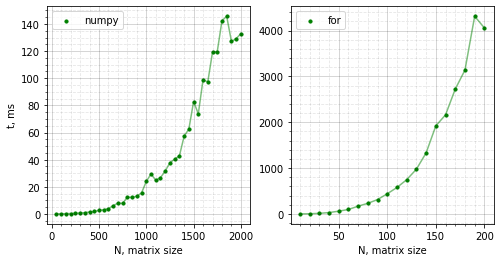

In [14]:
# построим графики
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(Xnp, Ynp, label="numpy", color="g", s=10)
axs[0].plot(Xnp, Ynp, color="g", alpha=0.5)
axs[0].set_xlabel("N, matrix size")
axs[0].set_ylabel("t, ms")

axs[1].scatter(Xfor, Yfor, label="for", color="g", s=10)
axs[1].plot(Xfor, Yfor, color="g", alpha=0.5)
axs[1].set_xlabel("N, matrix size")

axs[0].minorticks_on()
axs[0].grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
axs[0].grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
axs[0].legend()
axs[1].minorticks_on()
axs[1].grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
axs[1].grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
axs[1].legend()
plt.show()

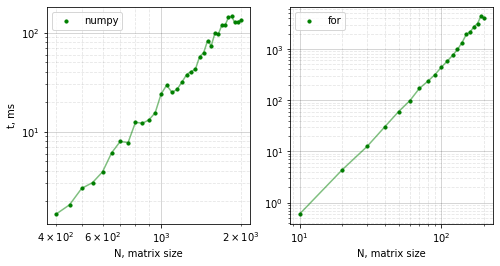

In [15]:
# построим графики в логарифмическом масштабе
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
start = 7
end = None
axs[0].scatter(Xnp[start:end], Ynp[start:end], label="numpy", color="g", s=10)
axs[0].plot(Xnp[start:end], Ynp[start:end], color="g", alpha=0.5)
axs[0].set_xlabel("N, matrix size")
axs[0].set_ylabel("t, ms")
axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[1].scatter(Xfor, Yfor, label="for", color="g", s=10)
axs[1].plot(Xfor, Yfor, color="g", alpha=0.5)
axs[1].set_xlabel("N, matrix size")
axs[1].set_yscale('log')
axs[1].set_xscale('log')

axs[0].minorticks_on()
axs[0].grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
axs[0].grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
axs[0].legend()
axs[1].minorticks_on()
axs[1].grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
axs[1].grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
axs[1].legend()
plt.show()

In [18]:
# заодно посмотрим на угол наклона в ln масштабе
start = 7
end = -3
x = np.log(Xnp[start:end])
y = np.log(Ynp[start:end])
coef = np.polyfit(x, y, 1, full=False)
print("t_numpy ~ N^{:.2f}".format(coef[0]))

start = 3
end = -1
x = np.log(Xfor[start:end])
y = np.log(Yfor[start:end])
coef = np.polyfit(x, y, 1, full=False)
print("t_numpy ~ N^{:.2f}".format(coef[0]))
print("но константа времени ощутимо разная")

t_numpy ~ N^3.05
t_numpy ~ N^3.13
но константа времени ощутимо разная


## Упражнение №2, Matplotlib

### Графики 2x2

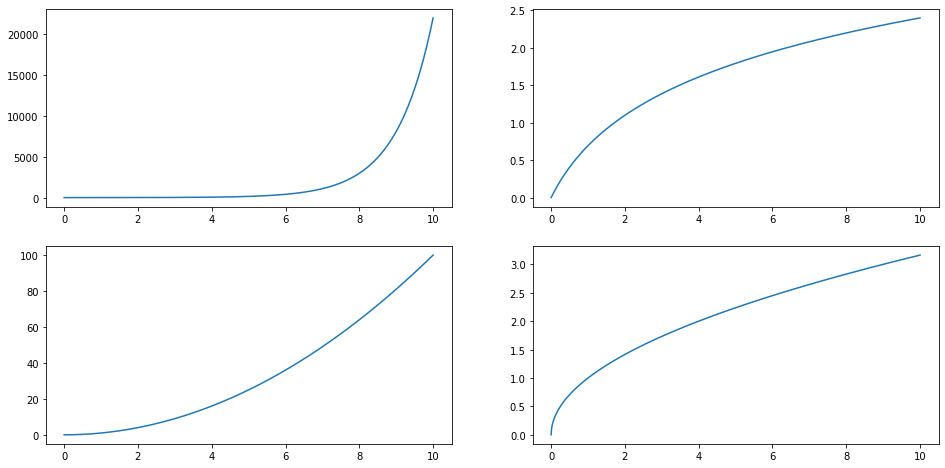

In [19]:
x = np.linspace(0, 10, 1000)
y1 = np.exp(x)
y2 = np.log(x+1)
y3 = x**2
y4 = np.sqrt(x)

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
axs[0][0].plot(x, y1)
axs[0][1].plot(x, y2)
axs[1][0].plot(x, y3)
axs[1][1].plot(x, y4)
plt.show()

### Построим график с крестами

In [20]:
# включить LaTeX для графиков
# plt.rcParams.update({"text.usetex": True})

In [21]:
# создадим функцию для визуализации данных
def viz_lab_plot(x, y, error, x_label, y_label, name=''):
    fig, ax = plt.subplots(dpi=100)
    font = {'fontname': 'Times New Roman'}

    # Подписи:
    ax.set_xlabel(x_label, **font)
    ax.set_ylabel(y_label, **font)

    # Сетка:
    ax.minorticks_on()
    ax.grid(True)
    ax.grid(which='major', linestyle = ':')
    ax.grid(which='minor', linestyle = ':')

    # Погрешность + точки:
    plt.errorbar(x, y, fmt='.k', ecolor='gray', 
                 yerr=error, label=u'эксп. изм.')

    # Легенда:
    matplotlib.rcParams["legend.framealpha"] = 1

In [22]:
# из таблички забираем данные
data = pd.read_excel("pump.xlsx")

t1 = data['t1']
p1 = data['p1']

y2 = np.log(p1[25:]-13)
x2 = (t1[25:])

yerr = 2/p1[25:]

In [23]:
# аппроксимируем прямой
coef2, res2, _, _, _ = np.polyfit(x2, y2, 1, full=True)
f2 = np.poly1d(coef2)

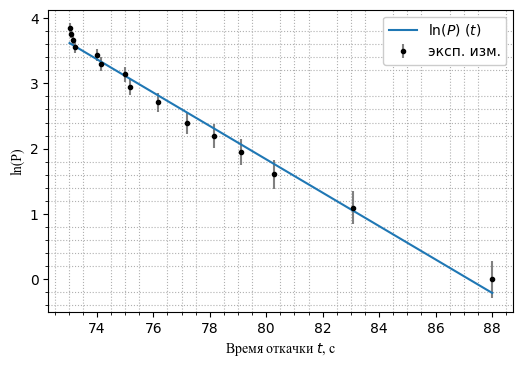

In [24]:
# построение графика
viz_lab_plot(x2, y2, 2*yerr, r"Время откачки $t$, с", "ln(P)")
plt.plot(x2, f2(x2), label=r"$\ln(P)$ ($t$)")
plt.legend(loc='best')
plt.savefig("lnPt.eps")

### Логарифмический масштаб

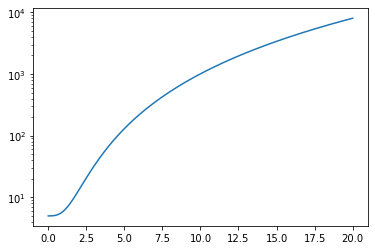

In [25]:
x = np.linspace(0, 20, 1000)
y = x**3 + 5

fig, ax = plt.subplots()
ax.plot(x, y)
plt.yscale('log')
plt.show()

## Упражнение 3, Вигнеровский полукруг

### Генерация

In [26]:
N = 500
M = np.random.normal(size=(N, N));

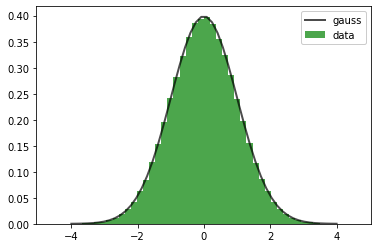

In [27]:
# проверим, что распределение нормальноe
x = np.linspace(-4, 4)
y = np.exp(-x**2/2) / np.sqrt(2 * np.pi)

plt.hist(M.flatten(), bins=50, density=True, color="g", alpha=0.7, label="data")
plt.plot(x, y, color="k", linewidth=2, alpha=0.7, label="gauss")
plt.legend()
plt.show()

In [28]:
# подготовим bins
bins = np.linspace(-62, 62, 50+1)
bin_centers = 0.5*(bins[1:] + bins[:-1])
all_eigs = 0

time: 0.33s


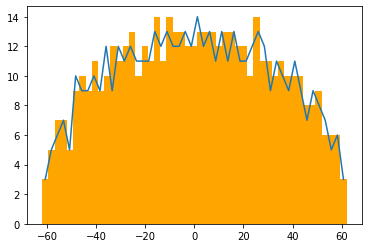

In [29]:
# первый пробный запуск: узнаем время и формируем основу
t1 = time.time()
M = np.random.normal(size=(N, N));
M = np.transpose(M) + M
eigs, _ = np.linalg.eig(M)
y, _ = np.histogram(eigs, bins=bins)
print("time: {:.2f}s".format(time.time()-t1))

# сохраняем полученные значения
all_eigs = [y];

plt.hist(eigs, bins=np.linspace(-62, 62, 50), color="orange")
plt.plot(bin_centers, y)
plt.show()

In [30]:
# собираем данные
for i in range(50):
    M = np.random.normal(size=(N, N));
    M = np.transpose(M) + M
    eigs, _ = np.linalg.eig(M)
    y, _ = np.histogram(eigs, bins=bins)
    all_eigs = np.concatenate((all_eigs,[y]), 0)
    
    clear_output(wait=True)
    print(i+1, "/", 50)

50 / 50


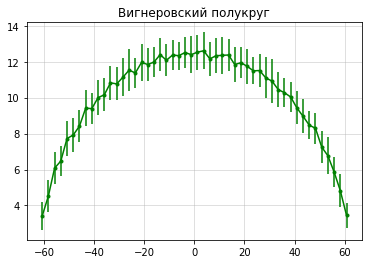

In [31]:
vals = np.mean(all_eigs, 0)

yerr = np.std(all_eigs, 0)

plt.errorbar(
    bin_centers,
    vals,
    yerr = yerr,
    marker = '.',
    color="green"
)

plt.title("Вигнеровский полукруг")
plt.grid(alpha=0.5)
plt.show()

### Гистограмма

In [32]:
N = 2000
M = np.random.normal(size=(N, N));
M = np.transpose(M) + M
eigs, _ = np.linalg.eig(M)

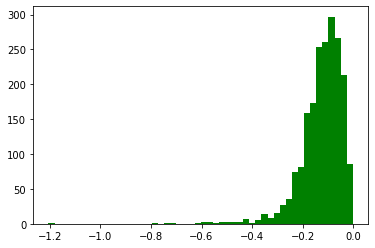

In [33]:
sort_eigs = np.sort(eigs)
y1 = sort_eigs[1:]
y2 = sort_eigs[:-1]
y = y2-y1
plt.hist(y, bins=50, color="g")
plt.show()